##### 여행지 일정 생성 

1. 클러스터 개수 = 여행 일수
2. 위도, 경도 기준으로 클러스터링
3. 클러스터링 중심점 구하기
4. 사용자 일자별 시작장소(첫째날은 공항,나머지날은 선택 숙소들..)
5. 3과 4 가까운 클러스터 연결...? 장소 당 클러스터 1개
6. Day 완성 => 관광지 경로 설정(카카오 api 활용 경로 탐색 or 직선 거리 기준 경로 탐색)카카오 api 일자별 숙소, 여행지 마크 표시 및 경로 

In [11]:
import pandas as pd
import numpy as np
from scipy.spatial import distance

In [27]:
import pandas as pd
from scipy.spatial import distance

jeju_airport = (126.492776,33.5070537)
#사용자 여행 일자
user_travel_day = 3

# 숙소 경도, 위도(ex: 1개)
user_data = pd.read_csv('./total_hostel.csv')
user_hostel1 = (user_data['longitude'].values[0], user_data['latitude'].values[0])
user_hostel2 = (user_data['longitude'].values[1], user_data['latitude'].values[1])


tourist_data = pd.read_csv('../final/sight_out_plan.csv')

# 사용자가 선택한 관광지 위치
tourist_locations = pd.read_csv('./user_select_sight.csv')
user_selected_sight_ids = tourist_locations['modelid']
selected_tourist_data = tourist_data[tourist_data['sightid'].isin(user_selected_sight_ids)]

# # 직선 거리 계산 및 추가
# selected_tourist_data['distance_to_user'] = selected_tourist_data.apply(
#     lambda row: distance.euclidean((row['longitude'], row['latitude']), user_hostel1),
#     axis=1
# )

In [28]:
selected_tourist_data

,sightid,name,type,address1,address2,tel,placetime,rating,review,medianprice,theme,themenum,firstimage,latitude,longitude
3,4,용머리해안,"해수욕장,해변",없음,제주 서귀포시 안덕면 사계리 112-3,064-760-6321,미제공,4.58,6319,1000,관광지,21,https://search.pstatic.net/common/?autoRotate=...,33.233482,126.314631
18,19,만장굴,문화재,제주 제주시 구좌읍 만장굴길 182,월정리 산41-5,064-710-7903,"화 09:00 - 18:00, 수 09:00 - 18:00, 목 09:00 - 18...",4.35,8060,2000,관광지,21,https://search.pstatic.net/common/?autoRotate=...,33.527589,126.771659
25,26,대포해안주상절리대,기념물,제주 서귀포시 이어도로 36-24,중문동 2757-10,미제공,매일 09:00 - 17:40,4.47,2136,1300,관광지,21,https://search.pstatic.net/common/?autoRotate=...,33.238700,126.426444
31,32,천제연폭포,폭포,제주 서귀포시 천제연로 132 천제연폭포관리소,중문동 2232,064-760-6331,"매일 09:00 - 17:20, - 폐장시간은 일몰시간에 따라 변경될 수 있음",4.47,7614,1350,관광지,21,https://search.pstatic.net/common/?autoRotate=...,33.252366,126.418336
42,43,제주김녕미로공원,"식물원,수목원",제주 제주시 구좌읍 만장굴길 122,김녕리 산16,0507-1402-9266,"매일 09:00 - 17:50, - (입장마감 17:00)자세한 입장마감시간은 매표...",4.51,9451,6600,관광지,21,https://search.pstatic.net/common/?autoRotate=...,33.536583,126.772390
48,49,서귀포자연휴양림,"휴양림,산림욕장",제주 서귀포시 1100로 882,대포동 산1-8,064-738-4544,"매일 09:00 - 17:00, - 숙박시설 이용시간: 15-12시",4.51,2467,700,관광지,21,https://search.pstatic.net/common/?autoRotate=...,33.310780,126.459777
49,50,서귀포 치유의 숲,"휴양림,산림욕장",제주 서귀포시 산록남로 2271,호근동 산4,064-760-3067,"매일 08:00 - 17:00 (하절기) 4월~10월 18시, 매일 09:00 - ...",4.59,3594,2000,관광지,21,https://search.pstatic.net/common/?autoRotate=...,33.292055,126.529512
53,54,거문오름,오름,제주 제주시 조천읍 선교로 569-36,선흘리 478,064-710-8981,"화 정기휴무 (매주 화요일), 수 09:00 - 13:00, 목 09:00 - 13...",4.65,1551,1000,관광지,21,https://search.pstatic.net/common/?autoRotate=...,33.456997,126.714306
57,58,붉은오름자연휴양림,"휴양림,산림욕장",제주 서귀포시 표선면 남조로 1487-73,가시리 산158,064-782-9171,매일 09:00 - 18:00,4.46,1884,700,관광지,21,https://search.pstatic.net/common/?autoRotate=...,33.396041,126.669145
70,71,동백포레스트,"식물원,수목원",제주 서귀포시 남원읍 생기악로 53-38,신례리 1767,0507-1331-2102,"화 정기휴무 (매주 화요일), 수 10:00 - 17:30, 목 10:00 - 17...",4.35,6113,5000,관광지,21,https://search.pstatic.net/common/?autoRotate=...,33.300345,126.636216


### 사용자가 선택한 관광지 경도,위도 기반 클러스링

In [29]:
from sklearn.cluster import KMeans

# 클러스터 개수 설정 (사용자 여행 일자)
num_clusters = user_travel_day

# K-Means 클러스터링 모델 생성
kmeans = KMeans(n_clusters=num_clusters, random_state=0)
cluster_labels = kmeans.fit_predict(selected_tourist_data[['longitude', 'latitude']])

# 클러스터링 결과를 데이터프레임에 추가
selected_tourist_data['cluster'] = cluster_labels

# 각 클러스터에 속하는 관광지 확인
for cluster in range(num_clusters):
    cluster_data = selected_tourist_data[selected_tourist_data['cluster'] == cluster]
    print(f'Cluster {cluster + 1}:')
    print(cluster_data)

C:\ProgramData\anaconda3\lib\site-packages\sklearn\cluster\_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
C:\ProgramData\anaconda3\lib\site-packages\sklearn\cluster\_kmeans.py:1382: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(


Cluster 1:
    sightid       name      type                   address1  \
3         4      용머리해안   해수욕장,해변                         없음   
25       26  대포해안주상절리대       기념물         제주 서귀포시 이어도로 36-24   
31       32      천제연폭포        폭포  제주 서귀포시 천제연로 132 천제연폭포관리소   
48       49   서귀포자연휴양림  휴양림,산림욕장          제주 서귀포시 1100로 882   

                 address2           tel  \
3   제주 서귀포시 안덕면 사계리 112-3  064-760-6321   
25            중문동 2757-10           미제공   
31               중문동 2232  064-760-6331   
48               대포동 산1-8  064-738-4544   

                                      placetime  rating  review  medianprice  \
3                                           미제공    4.58    6319         1000   
25                             매일 09:00 - 17:40    4.47    2136         1300   
31  매일 09:00 - 17:20, - 폐장시간은 일몰시간에 따라 변경될 수 있음    4.47    7614         1350   
48        매일 09:00 - 17:00, - 숙박시설 이용시간: 15-12시    4.51    2467          700   

   theme  themenum                                      

C:\Users\Playdata\AppData\Local\Temp\ipykernel_16864\1513625410.py:11: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  selected_tourist_data['cluster'] = cluster_labels


### 클러스터 중심점

In [30]:
# 평균
# 각 클러스터의 특성 계산
cluster_features = selected_tourist_data.groupby('cluster').agg({
    'longitude': np.mean,
    'latitude': np.mean,
    'name': 'count'  # 각 클러스터의 관광지 개수
}).reset_index()

# 각 클러스터의 특성 출력
print(cluster_features)

   cluster   longitude   latitude  name
0        0  126.404797  33.258832     4
1        1  126.752785  33.507056     3
2        2  126.611624  33.329480     3


### 시작 장소에 해당하는 가장 가까운 클러스터 할당

- 문제점 : 마지막 장소가 먼 클러스터에 할당될수 있음...(현재 데이터가 그렇다...)

In [31]:
import numpy as np

# 사용자 일자별 시작 위치 (공항, 숙소)
start_locations = [jeju_airport, user_hostel1, user_hostel2]

# 클러스터 중심점
cluster_centers = cluster_features[['longitude', 'latitude']].values

# 각 시작 위치에 가장 가까운 클러스터를 할당하는 함수
def assign_clusters(start_location, assigned_clusters, cluster_centers):
    min_distance = float('inf')
    closest_cluster = -1
    for i, center in enumerate(cluster_centers):
        dist = np.linalg.norm(start_location - center)  # 유클리드 거리 계산
        if dist < min_distance and i not in assigned_clusters:
            min_distance = dist
            closest_cluster = i
    return closest_cluster

# 시작 위치별로 클러스터 할당
assigned_clusters = []
for location in start_locations:
    cluster = assign_clusters(location, assigned_clusters, cluster_centers)
    assigned_clusters.append(cluster)

# 결과 출력
for i, location in enumerate(start_locations):
    cluster = assigned_clusters[i]
    print(f"Day {i + 1}: Start location {location} is assigned to Cluster {cluster + 1}")


Day 1: Start location (126.492776, 33.5070537) is assigned to Cluster 3
Day 2: Start location (126.401406450408, 33.4834452845662) is assigned to Cluster 1
Day 3: Start location (126.230147218432, 33.2392413490932) is assigned to Cluster 2


In [24]:
import numpy as np
from scipy.spatial import distance

# 클러스터 중심점
cluster_data = cluster_features[['longitude', 'latitude']].values

# 사용자 일자별 시작 위치 (공항, 숙소)
start_locations = [jeju_airport, user_hostel1, user_hostel2]

# 클러스터 할당을 추적하는 리스트
assigned_clusters = [None] * len(start_locations)

# 위치와 클러스터 간의 직선 거리 행렬 계산
dist_matrix = np.zeros((len(start_locations), len(cluster_data)))
for i, location in enumerate(start_locations):
    for j, cluster in enumerate(cluster_data):
        dist_matrix[i, j] = distance.euclidean(location, cluster)  # 유클리드 거리

# 시작 위치별로 가능한 클러스터 할당 확인
for i in range(len(start_locations)):
    # 가능한 클러스터 할당 후보
    candidate_clusters = list(range(len(cluster_data)))
    
    # 이미 할당된 클러스터를 제외한 후보 클러스터
    for assigned_cluster in assigned_clusters:
        if assigned_cluster in candidate_clusters:
            candidate_clusters.remove(assigned_cluster)
    
    # 가장 가까운 클러스터 선택
    closest_cluster = min(candidate_clusters, key=lambda cluster_idx: dist_matrix[i, cluster_idx])
    
    # 클러스터 할당
    assigned_clusters[i] = closest_cluster

# 결과 출력
for i, location in enumerate(start_locations):
    cluster = assigned_clusters[i]
    print(f"Start location {location} is assigned to Cluster {cluster + 1}")


Start location (126.492776, 33.5070537) is assigned to Cluster 3
Start location (126.401406450408, 33.4834452845662) is assigned to Cluster 1
Start location (126.230147218432, 33.2392413490932) is assigned to Cluster 2


In [33]:
import numpy as np
from scipy.spatial import distance

# 클러스터 중심점
cluster_data = cluster_features[['longitude','latitude']].values

# 사용자 일자별 시작 위치 (공항, 숙소)
start_locations = [jeju_airport, user_hostel1, user_hostel2]

# 각 위치(시작 위치)에 해당하는 가장 가까운 클러스터 할당
assigned_clusters = [None] * len(start_locations)  # None으로 초기화

# 각 클러스터의 할당된 장소 수를 추적하는 딕셔너리
# 클러스터 할당이 발생할 때마다 해당 클러스터에 할당된 장소 수를 증가
# 중복 없이 균등하게 클러스터 할당
cluster_assignments = {cluster: 0 for cluster in range(num_clusters)}

# 위치와 클러스터 간의 직선 거리 행렬 계산
# enumerate : 인덱스와 요소 쌍으로 반환
dist_matrix = np.zeros((len(start_locations), num_clusters))
for i, location in enumerate(start_locations):
    for j, cluster in enumerate(cluster_data):
        dist_matrix[i, j] = distance.euclidean(location, cluster) # 유클리드 거리

# 각 위치에 가장 가까운 클러스터 할당
for i in range(len(start_locations)):
    # 각 위치에서 가장 가까운 클러스터 인덱스
    # argmin : 최소값을 가지는 요소의 인덱스 찾아줌
    closest_cluster = np.argmin(dist_matrix[i])
    
    # 이미 할당된 클러스터와 중복되지 않도록 확인
    while cluster_assignments[closest_cluster] >= 1:
        # 두 번째로 가까운 클러스터
        dist_matrix[i, closest_cluster] = float('inf')
        closest_cluster = np.argmin(dist_matrix[i])
    
    # 클러스터 할당
    assigned_clusters[i] = closest_cluster
    cluster_assignments[closest_cluster] += 1

# 결과 출력
for i, location in enumerate(start_locations):
    print(f"Day {i + 1}: Start location {location} is assigned to Cluster {assigned_clusters[i] + 1}")

Day 1: Start location (126.492776, 33.5070537) is assigned to Cluster 3
Day 2: Start location (126.401406450408, 33.4834452845662) is assigned to Cluster 1
Day 3: Start location (126.230147218432, 33.2392413490932) is assigned to Cluster 2


In [34]:
dist_matrix

array([[0.26335206, 0.26000886, 0.21367566],
       [0.22463873, 0.35217079, 0.26057016],
       [       inf, 0.58726051,        inf]])

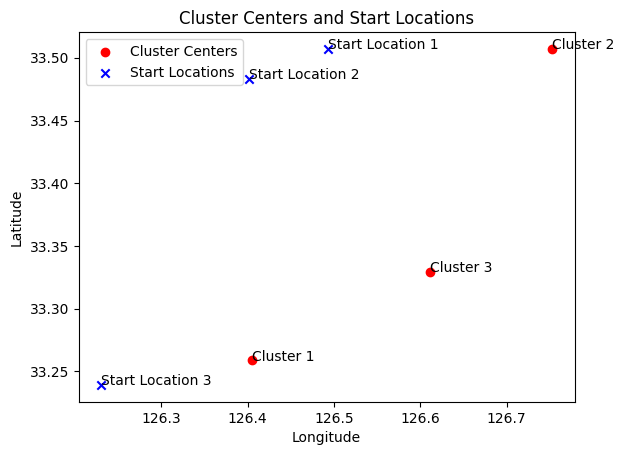

In [37]:
import matplotlib.pyplot as plt

# 클러스터 중심점과 시작 위치를 시각화
plt.scatter(cluster_data[:, 0], cluster_data[:, 1], marker='o', label='Cluster Centers', c='red')
plt.scatter(np.array(start_locations)[:, 0], np.array(start_locations)[:, 1], marker='x', label='Start Locations', c='blue')

# 각 클러스터 및 장소에 숫자 할당
for i, location in enumerate(start_locations):
    plt.annotate(f'Start Location {i+1}', (location[0], location[1]))
for i, cluster in enumerate(cluster_data):
    plt.annotate(f'Cluster {i+1}', (cluster[0], cluster[1]))

plt.xlabel('Longitude')
plt.ylabel('Latitude')
plt.legend()
plt.title('Cluster Centers and Start Locations')
plt.show()

In [44]:
# def calculate_center_coordinates(coordinates):
#     if not coordinates:
#         return None

#     total_lat = 0
#     total_lon = 0

#     for lat, lon in coordinates:
#         total_lat += lat
#         total_lon += lon

#     avg_lat = total_lat / len(coordinates)
#     avg_lon = total_lon / len(coordinates)

#     return (avg_lat, avg_lon)

# # 여러 경도와 위도 값을 포함하는 위치들의 리스트
# coordinates = [(latitude1, longitude1), (latitude2, longitude2), ...]

# center_coordinates = calculate_center_coordinates(coordinates)
# if center_coordinates:
#     center_latitude, center_longitude = center_coordinates
#     print(f"중심 지점의 경도: {center_longitude}, 위도: {center_latitude}")
# else:
#     print("중심 지점을 계산할 위치 데이터가 없습니다.")

In [45]:
# # 가까운 관광지 클러스터링
# # 클러스터링 거리 기준 설정
# cluster_distance = 0.1

# # 클러스터링
# clusters = []
# current_cluster = []

# selected_tourist_data = selected_tourist_data.sort_values(by='distance_to_user')

# for _, row in selected_tourist_data.iterrows():
#     if not current_cluster or row['distance_to_user'] - current_cluster[0]['distance_to_user'] <= cluster_distance:
#         current_cluster.append(row)
#     else:
#         clusters.append(current_cluster)
#         current_cluster = [row]

# # 마지막 클러스터 추가
# if current_cluster:
#     clusters.append(current_cluster)

# clusters

In [29]:
# 여행 일정 생성
travel_plans = []

for cluster in clusters_data:
    plan = {
        'locations': cluster,  # 클러스터 내의 관광지 정보
        'total_distance': sum([location['distance_to_user'] for location in cluster])
    }
    travel_plans.append(plan)

NameError: name 'clusters_data' is not defined

In [9]:
# 생성된 여행 일정 생성
for i, plan in enumerate(travel_plans):
    print(f"Travel Plan {i + 1}:")
    print(f"Total Distance: {plan['total_distance']} km")
    print("Locations:")
    for location in plan['locations']:
        print(f"- {location['']} (Distance: {location['distance_to_user']} km)")
    print()

Travel Plan 1:
Total Distance: 0.22864534355122323 km
Locations:


KeyError: 'name'